<a href="https://colab.research.google.com/github/dauten/DeepLearning/blob/develop/Final_Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
  from __future__ import absolute_import, division, print_function, unicode_literals

import time
import os
import random
import decimal
import sys
from queue import PriorityQueue
from threading import Thread

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras  import optimizers

# Helper libraries
import numpy as np
import pandas as pd
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import collections

# For RNN
from tensorflow.keras import layers

# Trying to get the GPU to the party to help speed up the training. -- Will
gpu = False
device_name = tf.test.gpu_device_name()

if (device_name != '/device:GPU:0'):
    print("WARNING: GPU NOT FOUND")
else:
    print(f"GPU FOUND AT: '{device_name}'")
    gpu = True

Using TensorFlow backend.


GPU FOUND AT: '/device:GPU:0'


In [0]:
'''
Given an array of training data and an array of labels, return a model that fits
that data within (currently hardcoded) parameters

data should be a list of char array's, labels should be a numeric identifier or quality
'''
def RNNtrain(data, labels, file, user, loud=0):
  print(tf.__version__)
  N = 0 #This is the item length, we need to find number of input edges
  for each in data:
    if len(each) > N:
      N = len(each)

  M = 1 #This is the item length, we need to find number of input edges
  for each in labels:
    if each > M:
      M = each


  max_features = 20000 # input
  maxlen = N # should be set to max length of email (in fin())
  batch_size = 32
  embedding_dims = 50
  filters = 25
  kernel_size = 3
  hidden_dims = 25

  model = keras.Sequential()

  # we start off with an efficient embedding layer which maps
  # our vocab indices into embedding_dims dimensions
  model.add(layers.Embedding(max_features,
                      embedding_dims,
                      input_length=maxlen))
  model.add(layers.Dropout(0.2))
  
  # we add a Convolution1D, which will learn filters
  # word group filters of size filter_length:
  model.add(layers.LSTM(128))
  model.add(layers.Activation('relu'))
  model.add(layers.BatchNormalization())
 
  # We add a vanilla hidden layer:
  model.add(layers.Dense(hidden_dims))
  model.add(layers.Dropout(0.2))
  model.add(layers.Activation('relu'))

  # We project onto a single unit output layer, and squash it with a sigmoid:
  model.add(layers.Dense(1))
  model.add(layers.Activation('sigmoid'))

  #])

  #this tells the neural net how to update things for training
  #sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # tried different learning rates

  model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

  #convert data and labels to ndarrays D and L
  train_images = np.ndarray((len(data), N))
  train_labels = np.ndarray((len(labels)))
  k = 0
  for i in data:
      q = 0
      for j in i:
        train_images[k][q] = ord(j)
        q+=1
      k+=1

  k = 0
  for l in labels:
      train_labels[k] = l
      k+=1
  train_labels = labelconvert(labels, user)
  train_labels = np.array(train_labels)
  
  #this is the actual 'train' step
  #you can play with epochs, increasing it takes longer but provides slightly more accuracy
  model.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=loud) # add "batch_size=x" here to do mini batch training (the default here is 32)
  model.save(file+".h5")
  open(file+".pad", "w").write(str(N))

  return N

In [0]:
def labelconvert(labels, target):
  out = list()
  for l in labels:
    if l == target:
      out.append(1)
    else:
      out.append(0)
  return out


In [0]:
'''
Given an array of training data and an array of labels, return a model that fits
that data within (currently hardcoded) parameters

data should be a list of char array's, labels should be a numeric identifier or quality
'''
def train(data, labels, file, user, loud=0):
  print(tf.__version__)
  N = 0 #This is the item length, we need to find number of input edges
  for each in data:
    if len(each) > N:
      N = len(each)

  M = 1 #This is the item length, we need to find number of input edges
  for each in labels:
    if each > M:
      M = each

  #the dense commands actually create neurons/nodes
  #model = keras.Sequential([keras.layers.Flatten(input_shape=((N,))),
      #keras.layers.Dense(2048, activation=tf.nn.relu), keras.layers.Dense(2048, activation=tf.nn.relu), 
     
      #keras.layers.Dense(2048, activation=tf.nn.relu), 
      #keras.layers.Dense(M+1, activation=tf.nn.softmax)])

  #model = keras.Sequential([keras.layers.Flatten(input_shape=((N,))),
      #keras.layers.Dense(2048, activation=tf.nn.relu), keras.layers.Dense(2048, activation=tf.nn.relu), keras.layers.Dense(2048, activation=tf.nn.relu), 
      #keras.layers.Dense(M+1, activation=tf.nn.softmax)])
  
# CNN
  #num_filters = 8
  #filter_size = 3

  #model = keras.Sequential()
  # model.add(layers.Reshape((32,4), input_shape=(N,)))
  #model.add(layers.Embedding(input_dim=N, output_dim=M+1, input_length=N))
  #model.add(layers.Flatten(input_shape=(N,1)))
  #model.add(layers.Conv1D(128, 5, activation='relu',  input_shape=(N, 1)))
  #model.add(layers.MaxPooling1D(2,2))
  
  #model.add(layers.Conv1D(64, 5, activation='relu'))
  #model.add(layers.MaxPooling1D(2,2))
  
  #
  #model.add(layers.Lambda(lambda x: tf.expand_dims(model.output, axis=-1)))
  #model.add(layers.Dense(10, activation='relu'))
  #model.add(layers.Dense(1, activation='softmax'))

  max_features = N # input
  maxlen = 20000 # should be set to max length of email (in fin())
  batch_size = 32
  embedding_dims = 50
  filters = 250
  kernel_size = 3
  hidden_dims = 250

  model = keras.Sequential()

  # we start off with an efficient embedding layer which maps
  # our vocab indices into embedding_dims dimensions
  model.add(layers.Embedding(max_features,
                      embedding_dims,
                      input_length=maxlen))
  model.add(layers.Dropout(0.2))
  
  # we add a Convolution1D, which will learn filters
  # word group filters of size filter_length:
  model.add(layers.Conv1D(filters,
                  kernel_size,
                  padding='valid',
                  activation='relu',
                  strides=1))
  # we use max pooling:
  model.add(layers.GlobalMaxPooling1D())

  # We add a vanilla hidden layer:

  model.add(layers.Dense(hidden_dims))
  model.add(layers.Dropout(0.2))
  model.add(layers.Activation('relu'))

  # We project onto a single unit output layer, and squash it with a sigmoid:
  model.add(layers.Dense(1))
  model.add(layers.Activation('sigmoid'))

  #])

  #this tells the neural net how to update things for training
  #sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # tried different learning rates
  model.summary()
  model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

  #convert data and labels to ndarrays D and L
  train_images = np.ndarray((len(data), N))
  train_labels = np.ndarray((len(labels)))
  k = 0
  for i in data:
      q = 0
      for j in i:
        train_images[k][q] = ord(j)
        q+=1
      k+=1

  k = 0
  for l in labels:
      train_labels[k] = l
      k+=1
  train_labels = labelconvert(labels, user)
  train_labels = np.array(train_labels)
  
  #this is the actual 'train' step
  #you can play with epochs, increasing it takes longer but provides slightly more accuracy
  # model.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=loud) # add "batch_size=x" here to do mini batch training (the default here is 32)
  # model.save(file+".h5")

  if gpu:
    with tf.device(device_name): # Added GPU support, and I think it's making a pretty big difference in training speed hopefully.
        model.fit(train_images, train_labels, epochs=6, batch_size=32, verbose=loud) # add "batch_size=x" here to do mini batch training (the default here is 32)
  else:
        model.fit(train_images, train_labels, epochs=10, batch_size=32, verbose=loud) # add "batch_size=x" here to do mini batch training (the default here is 32)
  
  model.save(file+".h5")
  open(file+".pad", "w").write(str(N))

  return N

In [0]:


'''
Given a set of test data, return predictions from the (currently hardcoded) model
'''
def evaluate(test,file):

  N = 0 #This is the item length, we need to find number of input edges
  for each in test:
    if len(each) > N:
      N = len(each)

  #convert data and labels to ndarrays D and L
  train_images = np.ndarray((len(test), 20000 ))
  k = 0
  for i in test:
      q = 0

      for j in i:

        train_images[k][q] = ord(j)
        q+=1
      k+=1
  model =  keras.models.load_model(file+".h5")

  #print(model.predict(train_images))
  return model.predict(train_images)



In [0]:
def fin(filedir, emails, verbose=1):
  #give a filedirectory, go through it to return tuple of data and labels
  #should consider each folder in filedir/ to be a new identifier (so len(labels)->150)
  #with the content of each file being the data
  m = 0
  data = list()
  labels = list()
  #for every folder in fildir:
  # for every item in folder:
  #   add item to data
  #   add folder to labels
  print(f"Loading data from {(filedir.split('/')[-2])}")
  for folder in sorted(os.listdir(filedir))[:10]:
    if verbose == 1:
      print("\tLoading "+folder)
    for file in os.listdir(filedir+"/"+folder)[0:emails]:
      data.append(list(open(filedir+folder+"/"+file, 'r').read())[0:20000])
      labels.append(m)
    m += 1
  return (data, labels)

def finNew(filedir, emails, verbose=1): # Threaded, much quicker version
  #give a filedirectory, go through it to return tuple of data and labels
  #should consider each folder in filedir/ to be a new identifier (so len(labels)->150)
  #with the content of each file being the data
  m = 0
  data = list()
  labels = list()


In [0]:
'''
Given an array, adequetly randomize it.
Data and labels are shuffled together
'''
def shuffle(data, labels):
  N = len(data)
  for i in range(N):
    #pick 2 random numbers in [0, N) and swap those indices
    n1 = random.randrange(0, N)
    n2 = random.randrange(0, N)
    td = data[n1]
    tl = labels[n1]
    data[n1] = data[n2]
    labels[n1] = labels[n2]
    data[n2] = td
    labels[n2] = tl
  return (data, labels)

In [0]:
def winner(arr):
  #given an output list of the NN return the index of the winner
  max_val = 0
  max_in = 0
  for line in range(len(arr)-1):
    #print("line is: "+str(line))
    if arr[line]*100 > max_val:
      max_val = arr[line]
      max_in = line

  
  return max_in

In [0]:
#inputs: normalized output matrix (output of evaluate), true labels, number of top guesses we should look at
#outputs: % of emails where one of our tolerance top guesses was the true label
def horseshoe(guesses, labels, tolerance, test=False):
  
  # Setup a testcase for now because the guesses aren't setup yet
  if test:
    guesses = np.random.rand(900, 9)
  
  totalCorrect = 0

  # clone the guess matrix, because we will be modifying it later
  guessClone = guesses.copy()

  for i in range(len(guesses)):
    # Grab data for the current email & the correct answer
    currentTraingItemCloned = guessClone[i]
    correctAnswer = labels[i]

    # try finding the correct answer [TOLERANCE] times
    for j in range(tolerance):
      # Find the index of the item with the maximum value
      maxIndex = np.argmax(currentTraingItemCloned)
      # if we find a correct answer, increment correct answers
      if maxIndex == correctAnswer:
        totalCorrect+= 1
        break
      else:
        # if it is not the correct answer, zero the current max, and try again
        currentTraingItemCloned[maxIndex] = 0
  
  outputAccuracy = decimal.Decimal(totalCorrect) / decimal.Decimal(len(guesses))
  # Calculate the error rate as a float between 0 and 1
  return outputAccuracy

In [0]:
'''
Given an array determine how many of each items it has--Ideally it should be a
roughly linear distribution when there's an equal amount of each label
'''
def dist(arr):
    S = sorted(arr)
    print(S)
    tracker = S[0]
    counter = 0
    for each in S:
      if tracker != each:
        print("We had "+str(counter)+" label "+str(tracker)+"'s")
        tracker = each
        counter = 1
      else:
        counter += 1

In [0]:
'''
Given an array of training data and an array of labels, return a model that fits
that data within (currently hardcoded) parameters

data should be a list of char array's, labels should be a numeric identifier or quality
'''
def FFtrain(data, labels, file):
  N = 0 #This is the item length, we need to find number of input edges
  for each in data:
    if len(each) > N:
      N = len(each)

  M = 1 #This is the item length, we need to find number of input edges
  for each in labels:
    if each > M:
      M = each


  #the dense commands actually create neurons/nodes
  model = keras.Sequential([keras.layers.Flatten(input_shape=((N,))),
      keras.layers.Dense(2048, activation=tf.nn.relu), keras.layers.Dense(2048, activation=tf.nn.relu), keras.layers.Dense(2048, activation=tf.nn.relu),
      keras.layers.Dense(M+1, activation=tf.nn.softmax)])

  #this tells the neural net how to update things for training
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


  #convert data and labels to ndarrays D and L
  train_images = np.ndarray((len(data), N))
  train_labels = np.ndarray((len(labels)))
  k = 0
  for i in data:
      q = 0
      for j in i:
        train_images[k][q] = ord(j)
        q+=1
      k+=1

  k = 0
  for l in labels:
      train_labels[k] = l
      k+=1

  #this is the actual 'train' step
  #you can play with epochs, increasing it takes longer but provides slightly more accuracy
  model.fit(train_images, train_labels, epochs=50) # add "batch_size=x" here to do mini batch training (the default here is 32)
  model.save(file+".h5")
  open(file+".pad", "w").write(str(N))

  return N

In [0]:
def score(evaluation, labels, v):
  if v != 0:
    print(e.round(2))

  c = list()
  matches = 0
  pernum = [0,0,0,0,0,0,0,0,0,0,0,0,0]

  for i in range(len(e)):
    c.append(winner(e[i]))

  for i in range(len(e)):
    if c[i] == labels[i]:
      matches += 1
      pernum[labels[i]] += 1
  for i in range(labels[-1]+1):
    this = pernum[i]
    if v != 0:
      print("For items with label: "+str(i)+" we had an accuracy of "+str(this)+"%")

  print(str(100*matches/len(e))+"% correct (over ten is all right)")

  #dist(c)
  # NOTE: with the last flag flipped to true, horseshoe generates its own test data & ignores 'e' data
  h = horseshoe(e, labels, 3)
  print("Horseshoe algorithm accuracy: {}%".format(h * 100))
  #print("Counting top 3 we got "+str(h/len(e))+" things right")


In [0]:
def getStatsModel(file_name, threshold=0.25):
  #Author: Jacob Grubb
  #Functionality: Calculate the AUC Scores for our model
  #Input: 
  #     file_name: Name of csv input file, containing data formatted as specified below
  #     threshold: Values above this Default os 0.25
  #Output:
  #     Text block containing Recall, Precision, F-score, and ROC-AUC for learning model
  #     Chart drawing
  
  data = pd.read_csv(file_name, names=["score", "truth"])
  data = data.sort_values(by=['score'], ascending=False)
  
  results = [(0,0)]
  pos_count = 0#data["truth"].value_counts()[1]
  neg_count = 0#data["truth"].value_counts()[0]
  
  for index, email in data.iterrows():
    #if the correct prediction lies within our threshhold
    if (float(email[0]) > threshold and email[1]==1):
      pos_count += 1 #Increment the number of positives seen
    elif (float(email[0]) > threshold and email[1]==0):
      neg_count += 1 #Increment the number  of negatives seen
  auc = 0 
  fp = 0  
  tp = 0
  tn = 0
  fn = 0
  for index, email in data.iterrows():
    #if the correct prediction lies within our threshhold
    if (float(email[0]) > threshold and email[1]==1):
      tp += 1 #Increment the number of true positives seen
    elif (float(email[0]) > threshold and email[1]==0):
      fp += 1 #Increment the number  of false positives seen
      auc = auc + ((1/neg_count) * (tp/pos_count))
    elif (float(email[0]) < threshold and email[1]==1):
      fn += 1 #Increment the number  of false negatives seen
    elif (float(email[0]) < threshold and email[1]==0):
      tn += 1 #Increment the number  of true positives seen
    results.append((fp/neg_count, tp/pos_count))

  new_fp, new_tp = map(list, zip(*results))
  #print(results)
  recall = tp / (tp + fn)
  precision = tp / (tp + fp)  
  fscore = (2 * precision * recall) / (precision + recall)
  
  with open(file_name, "w") as outFile:
    outFile.write("Generating stats for: " +  file_name + "\n")
    outFile.write("Recall: " + str(recall) + "\nPrecision: " + str(precision) + "\nF-Score: " + str(fscore) + "\nAUC: " + str(auc)) 
  

  plt.scatter(new_fp, new_tp)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-AUC')
  plt.plot([0,1], [0,1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

Loading data from test
	Loading bass-e-test
	Loading dasovich-j-test
	Loading germany-c-test
	Loading jones-t-test
	Loading kaminski-v-test
	Loading perlingiere-d-test
	Loading sanders-r-test
	Loading shackleton-s-test
	Loading symes-k-test
	Loading taylor-m-test
Loading data from test
	Loading bass-e-test
	Loading dasovich-j-test
	Loading germany-c-test
	Loading jones-t-test
	Loading kaminski-v-test
	Loading perlingiere-d-test
	Loading sanders-r-test
	Loading shackleton-s-test
	Loading symes-k-test
	Loading taylor-m-test
Loading data from test
	Loading bass-e-test
	Loading dasovich-j-test
	Loading germany-c-test
	Loading jones-t-test
	Loading kaminski-v-test
	Loading perlingiere-d-test
	Loading sanders-r-test
	Loading shackleton-s-test
	Loading symes-k-test
	Loading taylor-m-test
Loading data from test
	Loading bass-e-test
	Loading dasovich-j-test
	Loading germany-c-test
	Loading jones-t-test
	Loading kaminski-v-test
	Loading perlingiere-d-test
	Loading sanders-r-test
	Loading shackle

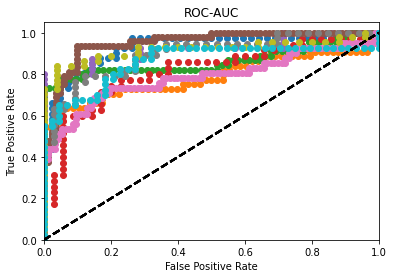

In [0]:
num_emails = 1000 #number of emails to use from each user
verbose= 1 #set to 0 to print only very little stuff.  Set 1 to print file IO information and epochs
confidence = .2 #answers above this confidence will be counted as a positive guess
FFNN = 0 #toggle FFNN.  Set to not 1 for CNN
train_bool = 0 #whether we should train first.  Set to 0 to go straight to eval


data,labels = fin("/content/drive/My Drive/TEST/candidates/test/", num_emails, verbose)

if train_bool == 1:
  datat,labelst = fin("/content/drive/My Drive/TEST/candidates/train/", num_emails, verbose)

if FFNN == 1:
  print("Beginning train:")
  if train_bool == 1:
    FFtrain(datat, labelst, "enronFF")
  e = evaluate(data, "enronFF")
  score(e, labelst, verbose) #print statistics.  If v = 1 then print more statistics
else:
  if train_bool == 1:
    for i in range(0, 10):

      print("Beginning Train "+str(i)+"\n\n")
      train(datat, labelst, "/content/drive/My Drive/TEST/Models/SingleCNN/enronsat_"+str(i), i, loud=verbose) #set loud to 0 to print output from training

  for i in range(0,10):
    #try:

      e = evaluate(data, "/content/drive/My Drive/TEST/Models/SingleCNN/enronsat_"+str(i))

      data,labels = fin("/content/drive/My Drive/TEST/candidates/test/", num_emails, verbose)
      labels = labelconvert(labels, i)
      labels = np.array(labels)

      if verbose == 1:
        with open("/content/drive/My Drive/TEST/Models/SingleCNN/enronsat_user_" + str(i) + ".txt", "w") as outfile:
          for num in range(len(labels)): #was e
              curr_label = str(labels[num])
              curr_pred = str(e[num][0].round(2))
              #we could tweak this to this is written to file
              outfile.write(str(curr_pred) + ", " + str(curr_label) + "\n")
        getStatsModel("/content/drive/My Drive/TEST/Models/SingleCNN/enronsat_user_" + str(i) + ".txt", threshold=0.25)
    #except:
      #print("Yep, it crashed")
